## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2021)

Pekka Marttinen, Santosh Hiremath, Tianyu Cui, Yogesh Kumar, Zheyang Shen, Alexander Aushev, Khaoula El Mekkaoui, Shaoxiong Ji, Alexander Nikitin, Sebastiaan De Peuter, Joakim Järvinen.

## Exercise 6, due on Tuesday March 16 at 23:00.

### Contents
1. Problem 1: Deriving VB for a simple model (1/2)
2. Problem 2: Deriving VB for a simple model (2/2)
3. Problem 3: KL-divergence
4. Problem 4: Variational approximation for a simple distribution

# Problem 1: Deriving VB for a simple model (1/2)
Consider the variational Bayesian approximation for the example model from the lecture (see 'simple_vb_example.pdf' in the materials of lecture 6). Derive the VB update for the factor $ q(\tau)$ in the example and complete the code block 'Problem 1' in the template given below.


$$
\begin{aligned}
\log q^{*}(\tau) &=E_{\mathbf{z}, \theta}[\log p(\mathbf{x}, \mathbf{z}, \tau, \theta)] \\
&=\log p(\tau)+E_{\mathbf{z}}[\log p(\mathbf{z} \mid \tau)]+\text { const }\\
&=\log \left(\frac{\tau^{\alpha_{0}-1}(1-\tau)^{\alpha_{0}-1}}{\operatorname{const}}\right)+E_{\mathbf{z}}\left[\sum_{n=1}^{N}\log(
 \tau^{z_{n 2}}(1-\tau)^{z_{n 1}})\right]+const\\
&=(\alpha_{0}-1)\log\tau+(\alpha_{0}-1)\log(1-\tau)+
\log \tau \sum_{n=1}^{N} E_{z}\left(z_{n 2}\right)+\log (1-\tau) \sum_{n=1}^{N} E_{z}\left(z_{n 1}\right)+\text { const }\\
&=\log \tau \left(\alpha_0-1+\sum_{n=1}^{N} E_{z}(z_{n 2})\right)+\log (1-\tau)\left(\alpha_0-1+\sum_{n=1}^{N} E_{z}(z_{n 1})\right)+\text{const}\\
&=log \tau \left(\alpha_0-1+\sum_{n=1}^{N}r_{n2}\right)+\log (1-\tau)\left(\alpha_0-1+\sum_{n=1}^{N} r_{n1}\right)+\text{const}\\
&=log \tau \left(\alpha_0-1+N_2\right)+\log (1-\tau)\left(\alpha_0-1+ N_1\right)+\text{const}\\
\end{aligned}
$$
Therefore $
q^{*}(\tau)=\operatorname{Beta}\left(\tau \mid N_{2}+\alpha_{0}, N_{1}+\alpha_{0}\right).
$

# Problem 2: Deriving VB for a simple model (2/2)
As in Problem 1, consider the variational Bayesian approximation for the example model from the lecture (simple vb example.pdf). Now, derive the VB update for the factor $q(\theta)$ in the example and complete the code block 'Problem 2’ in the template below. 




$$
\begin{aligned}
\log q^{*}(\theta)&=E_{\tau, z}[\log p(\mathbf{x}, \mathbf{z}, \tau, \theta)]\\
&=\log p(\theta)+E_{\mathbf{z}}[\log p(\mathbf{x} \mid \mathbf{z}, \theta)]+\text{const}\\
&=\log p(\theta)+E_{\mathbf{z}}\left(\sum_{n=1}^{N}z_{n 1} \log N\left(x_{n} \mid 0,1\right)+z_{n 2} \log N\left(x_{n} \mid \theta, 1\right)\right)+\text{const}\\
&=\log p(\theta)+E_{\mathbf{z}}\left(\sum_{n=1}^{N} z_{n 2} \log N\left(x_{n} \mid \theta, 1\right)\right)+\text{const}\\
&=\log p(\theta)-\frac{1}{2}\sum_{n=1}^{N} E_{\mathbf{z}} \left(z_{n 2}\right)\left(x_{n}-\theta\right)^{2}+\text{const}\\
&=-\frac{1}{2} \theta^{2} \beta_{0}-\frac{1}{2}\sum_{n=1}^{N} E_{\mathbf{z}}(z_{n2})(x_n^2-2x_n\theta+\theta^2)+\text{const}\\
&=-\frac{1}{2} \theta^2\left(\beta_0+\sum_{n=1}^{N} E_{\mathbf{z}}(z_{n2})\right)+\theta\sum_{n=1}^{N} E_{\mathbf{z}}(z_{n2})x_n+\text{const}\\
&=-\frac{1}{2}\left( \theta-(\beta_0+\sum_{n=1}^{N} E_{\mathbf{z}}(z_{n2}))^{-1}\sum_{n=1}^{N} E_{z}\left(z_{n 2}\right) x_{n}\right)^2(\beta_0+\sum_{n=1}^{N} E_{\mathbf{z}}(z_{n2}))+\text{const}\\
&=-\frac{1}{2}\left( \theta-(\beta_{0}+N_{2})^{-1}\beta_{2}^{-1} N_{2} \bar{x}_{2}\right)^2(\beta_{0}+N_{2})+\text{const}
\end{aligned}
$$
Therefore $q^{*}(\theta)=N\left(\theta \mid m_{2}, \beta_{2}^{-1}\right)$, with
$$\beta_{2}=\beta_{0}+N_{2} \quad \text { and } \quad m_{2}=\beta_{2}^{-1} N_{2} \bar{x}_{2},$$ where we have defined
$$
\bar{x}_{2}=\frac{1}{N_{2}} \sum_{n=1}^{N} r_{n 2} x_{n}.
$$

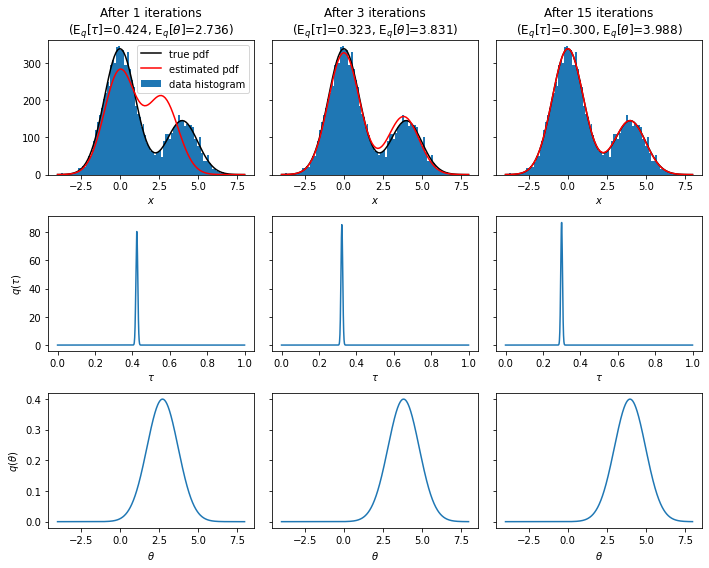

In [30]:
# Template for problems 1 and 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

np.random.seed(123123123)

# Simulate data
theta_true = 4
tau_true = 0.3
n_samples = 10000
z = (np.random.rand(n_samples) < tau_true)  # True with probability tau_true
x = np.random.randn(n_samples) + z * theta_true

# Parameters of the prior distributions.
alpha0 = 0.5
beta0 = 0.2

# The number of iterations
n_iter = 15

# Some initial value for the things that will be updated
E_log_tau = -0.7   # E(log(tau))
E_log_tau_c = -0.7  # E(log(1-tau))
E_log_var = 4 * np.ones(n_samples)  # E((x_n-theta)^2)
r2 = 0.5 * np.ones(n_samples)  # Responsibilities of the second cluster.

# init the plot
iters_to_plot = [0, 2, 14]
fig, ax = plt.subplots(3, len(iters_to_plot), figsize=(10, 8), sharex='row', sharey='row')
col = 0 # plot column

for i in range(n_iter):
    
    # Updated of responsibilites, factor q(z)
    log_rho1 = E_log_tau_c - 0.5 * np.log(2 * np.pi) - 0.5 * (x ** 2)
    log_rho2 = E_log_tau - 0.5 * np.log(2 * np.pi) - 0.5 * E_log_var
    max_log_rho = np.maximum(log_rho1, log_rho2)  # Normalize to avoid numerical problems when exponentiating.
    rho1 = np.exp(log_rho1 - max_log_rho)
    rho2 = np.exp(log_rho2 - max_log_rho)
    r2 = rho2 / (rho1 + rho2)
    r1 = 1 - r2
    
    N1 = np.sum(r1)
    N2 = np.sum(r2)
    
    # ====== Problem 1 =======================
    # Update of factor q(tau)    
    # E_log_tau = ? # EXERCISE
    # E_log_tau_c = ? # EXERCISE

    # Current estimate of tau
    # tau_est = ? (mean of q(tau))    
    #=========================================

    # YOUR CODE HERE
    from scipy.special import digamma
    E_log_tau =digamma(N2+alpha0)-digamma(N1+N2+2*alpha0)
    E_log_tau_c =digamma(N1+alpha0)-digamma(N1+N2+2*alpha0)
    
    tau_est=(N2+alpha0)/(N1+N2+2*alpha0)
    # ====== Problem 2 =======================
    # Update of factor q(theta)
    # E_log_var = ? #EXERCISE

    # Current estimate theta
    # theta_est = ? #EXERCISE
    #=========================================
    
    # YOUR CODE HERE
    beta2 = beta0 + N2
    x2_bar = 1 / N2 * np.sum(r2 * x)
    m2 = 1 / beta2 * N2 * x2_bar
    
    E_log_var = (x - m2) ** 2 + 1 / beta2
    theta_est = m2
    
    
    # plotting
    if i in iters_to_plot:
        # plot estimated data distribution
        xgrid = np.linspace(-4, 8, 100)
        ax[0,col].hist(x, xgrid, label="data histogram")
        pdf_true = (1-tau_true) * norm.pdf(xgrid, 0, 1) + tau_true * norm.pdf(xgrid, theta_true, 1)
        pdf_est = (1-tau_est) * norm.pdf(xgrid, 0, 1) + tau_est * norm.pdf(xgrid, theta_est, 1)
        ax[0,col].plot(xgrid, pdf_true * n_samples * (xgrid[1]-xgrid[0]), 'k', label="true pdf")
        ax[0,col].plot(xgrid, pdf_est * n_samples * (xgrid[1]-xgrid[0]), 'r', label="estimated pdf")
        if i == 0:
            ax[0,i].legend()
        ax[0,col].set_title(("After %d iterations\n" +
                            "($\\mathrm{E}_q[\\tau]$=%.3f, $\\mathrm{E}_q[\\theta]$=%.3f)") %
                            (i + 1, tau_est, theta_est))
        ax[0,col].set_xlabel("$x$")
        
        # plot marginal distribution of tau
        tau = np.linspace(0, 1.0, 1000)
        q_tau = beta.pdf(tau, N2 + alpha0, N1 + alpha0)
        ax[1,col].plot(tau, q_tau)
        ax[1,col].set_xlabel("$\\tau$")
        
        # plot marginal distribution of theta
        theta = np.linspace(-4.0, 8.0, 1000)
        q_theta = norm.pdf(theta, m2, 1.0)
        ax[2,col].plot(theta, q_theta)
        ax[2,col].set_xlabel("$\\theta$")
        col = col + 1

# finalize the plot
ax[1,0].set_ylabel("$q(\\tau)$")
ax[2,0].set_ylabel("$q(\\theta)$")
plt.tight_layout()
plt.show()


# Problem 3: KL-divergence  
Recall the Normal-Gamma posterior example from lecture 3. Your task is to compute the KL-divergence between the true distribution of the samples and the distribution estimated using Bayesian learning. Repeat the computation for training set sizes in the range 5–5000 and as a final output, plot the KL-divergence as a function of the training set size. 

You can use the template below as a starting point. You will need to write the computation of the KL-divergence between the true and learned distributions and plot the results (you may remove the existing plots, as they are not needed for this exercise). More hints are given in the template. 

Text(0.5, 0, 'training set size')

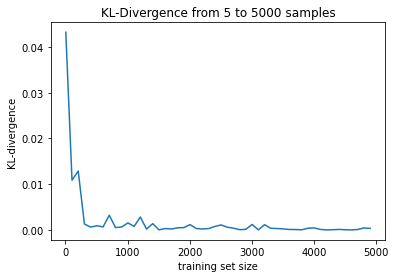

In [27]:
# Template for problem 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

np.random.seed(91) # Set random number generator.

kl_div = []
for num_samples in range(5, 5001, 100):
    # SIMULATE THE TRUE DATA SET

    lambda_true = 4   # precision
    mu_true = 2       # mean
    sigma_true = 1 / np.sqrt(lambda_true)   # standard deviation
    data_set = np.random.normal(mu_true, sigma_true, num_samples)

    # SPECIFY PRIORS

    # lambda is the precision parameter of the unknown Gaussian
    # and it is given a prior distribution Gamma(a0,b0),
    # (a0 is the 'shape' and b0 the 'rate')
    a0 = 0.01
    b0 = 0.01 # These correspond to a noninformative prior

    # mu is the mean parameter of the unknown Gaussian
    # and it is given a prior distribution that depends on
    # lambda: N(mu0, (beta0*lambda)^-1)
    mu0 = 0
    beta0 = 0.001 # Low precision corresponds to high variance

    # (This is the so-called Normal-Gamma(mu0, beta0, a0, b0)
    # prior distribution for mu and lambda)


    # LEARN THE POSTERIOR DISTRIBUTION

    # Due to conjugacy, the posterior distribution is also
    # Normal-Gamma(mu_n, beta_n, a_n, b_n)

    sample_mean = sum(data_set) / num_samples;
    sample_var = sum((data_set - sample_mean)**2) / num_samples;

    a_n = a0 + num_samples / 2

    b_n = b0 + (num_samples * sample_var + (beta0 * num_samples * (sample_mean-mu0)**2) / (beta0 + num_samples)) / 2

    mu_n = (mu0 * beta0 + num_samples * sample_mean) / (beta0 + num_samples)

    beta_n = beta0 + num_samples


    # Plot distribution of lambda, the precision
    lambda_range = np.arange(0, 10, 0.01)
    prior_lambda_pdf     = gamma.pdf(lambda_range, a0,  scale=1/b0)
    posterior_lambda_pdf = gamma.pdf(lambda_range, a_n, scale=1/b_n)

    # Plot distribution of mu, the mean
    mu_range = np.arange(1, 3, 0.01)
    # Because mu depends on lambda, we need to integrate over 
    # lambda. We do this by Monte Carlo integration (i.e. 
    # average over multiple simulated lambdas)
    gamma_prior_samples = np.random.gamma(a0, 1/b0, 100)

    sum_prior_mu_pdf = np.zeros(len(mu_range))
    for gamma_sample in gamma_prior_samples:
        prior_mu_pdf = norm.pdf(mu_range, mu0, 1 / np.sqrt((beta0 * gamma_sample)))
        sum_prior_mu_pdf += prior_mu_pdf

    prior_mu_pdf = sum_prior_mu_pdf / len(gamma_prior_samples)

    gamma_posterior_samples = np.random.gamma(a_n, 1/b_n, 100)

    sum_posterior_mu_pdf = np.zeros(len(mu_range))
    for gamma_sample in gamma_posterior_samples:
        posterior_mu_pdf = norm.pdf(mu_range, mu_n, 1 / np.sqrt(beta_n * gamma_sample))
        sum_posterior_mu_pdf += posterior_mu_pdf

    posterior_mu_pdf = sum_posterior_mu_pdf / len(gamma_prior_samples)

    # plt.plot(mu_range, prior_mu_pdf, label="prior")
    # plt.plot(mu_range, posterior_mu_pdf, label="posterior")
    # plt.plot([mu_true,mu_true],[0,2.5], "k-", label="true value")
    # plt.title('mu')
    # plt.legend()
    # plt.show()

    # We estimate the parameters with the mean of the posterior distribution
    mu_hat     = sum(posterior_mu_pdf     * mu_range)     / sum(posterior_mu_pdf)
    lambda_hat = sum(posterior_lambda_pdf * lambda_range) / sum(posterior_lambda_pdf)

    full_dist_range = np.arange(-2, 6, 0.1)
    true_pdf      = norm.pdf(full_dist_range, mu_true, sigma_true)
    estimated_pdf = norm.pdf(full_dist_range, mu_hat,  1 / np.sqrt(lambda_hat))
    
    # plt.plot(full_dist_range, true_pdf, label="true")
    # plt.plot(full_dist_range, estimated_pdf, label="estimated")
    # plt.title('Distribution of the samples')
    # plt.legend()
    # plt.show()

    # ====== Problem 3 =======================
    # COMPUTE K-L DIVERGENCE BETWEEN TRUE AND ESTIMATED SAMPLE DISTRIBUTIONS 
    # (two alternative numerical integration techniques)
    # Hints: 
    # For computing the KL-divergence, use numerical integration over a grid of 
    # values. "full_dist_range" specifies a suitable grid along the x-axis.
    # Values of the true PDF estimated at the grid points are given in 
    # "true_pdf" and values of the estimated PDF at the grid points are given
    # in "estimated_pdf". For computing the integral, you can use any numerical
    # integration available in Numpy, e.g., the "trapz" function.
    # ========================================
# YOUR CODE HERE
    KL=-np.trapz(y=(estimated_pdf*np.log(true_pdf/estimated_pdf)),x=full_dist_range)
    kl_div.append(KL)
plt.title("KL-Divergence from 5 to 5000 samples")
plt.plot(range(5, 5001, 100),kl_div)
plt.ylabel("KL-divergence")
plt.xlabel("training set size")

# Problem 4: Variational approximation for a simple distribution
Consider a model with two binary random variables $x_1 and $x_2, defined by the distributions:

$p(x_1=0) = 0.4$

$p(x_2=0|x_1=0) = 0.5$, 

$p(x_2=1|x_1=0) = 0.5$

$p(x_2=0|x_1=1) = 0.9$, 

$p(x_2=1|x_1=1) = 0.1$

Find a fully factorized distribution $q(x_1, x_2) = q_1(x_1)q_2(x_2)$ that best approximates the joint $p(x_1, x_2)$, in the sense of minimizing $KL(p || q )$ .

**Note**: For “normal” variational inference, we would rather minimize $KL(q || p )$; recall that, in general, $KL(p || q ) \neq KL(q || p )$ (see Barber: Bayesian Reasoning and Machine Learning, ch. Figure 28.1 as well as Chapter 28.3.4 and 28.3.5, for the dramatically different solutions that can result by minimizing the different quantities, as well as commentary on their relative usefulness for approximate inference). Here, we’ll minimize $KL(p || q )$ , as that is algebraically simpler.




Assume that $q_1(x=0)=m$ and $q_2(x=0)=n$, and we have $q_1(x=1)=1-m$ and $q_2(x=1)=1-n$. Then we have
$$
\begin{aligned}
K L_{p \| q}&=-\left((0.5\times0.4)\log(\frac{mn}{0.5\times0.4})+0.5\times0.4\log(\frac{m(1-n)}{0.5\times0.4})\right.\\ 
&\left. +(0.9\times0.6)\log(\frac{(1-m)n}{0.9\times0.6})+(0.1\times0.6)\log(\frac{(1-m)(1-n)}{0.1\times0.6})\right)\\
&=-(0.2\log(mn)+0.2\log(m(1-n)) +0.54\log((1-m)n)+0.06\log((1-m)(1-n)) \\ 
&-0.2\log(0.2)-0.2\log(0.2)-0.54\log(0.54)-0.06\log(0.06))\\
&=-\log\left((mn)^{0.2}(m-mn)^{0.2}(n-mn)^{0.54}(1-m-n+mn)^{0.06}\right)+c.
\end{aligned}
$$
Then we compute the partial derivative of $K L_{p \| q}$ w.r.t. $m$
$$
\begin{aligned}
\frac{\partial{K L_{p \| q}}}{\partial m}
&=-\frac{0.2(1-n)}{m-mn}-\frac{0.2n}{mn}+\frac{0.54n}{n-mn}-\frac{0.06(n-1)}{mn-m-n+1}\\
&=-\frac{0.4}{m}-\frac{0.6}{m-1}\\
&=0.
\end{aligned},
$$
and thus $m=0.4$. 


Similarly, we compute thepartial derivative of  $K L_{p \| q}$ w.r.t. $n$,
\begin{aligned}
\frac{\partial{K L_{p \| q}}}{\partial n}&=-\frac{0.54(1-m)}{n-mn}-\frac{0.2 m}{mn}+\frac{0.2m}{m-mn}-\frac{0.06(m-1)}{mn-m-n+1}\\
&=-\frac{0.74}{n}-\frac{0.26}{n-1}\\
&=0,
\end{aligned}
and thus $n=0.74$.

All in all, $q_1(x=0)=0.4$ and $q_2(x=0)=0.74$